In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import cv2

In [16]:
data_generator = ImageDataGenerator(rescale=1/255)

print('<Train 데이터>')
train_generator = data_generator.flow_from_directory(
    './Dataset/Train',
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)
print('<Test 데이터>')
test_generator = data_generator.flow_from_directory(
    './Dataset/Test',
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)
print('<Validation 데이터>')
validation_generator = data_generator.flow_from_directory(
    './Dataset/Validation',
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

<Train 데이터>
Found 160000 images belonging to 2 classes.
<Test 데이터>
Found 20001 images belonging to 2 classes.
<Validation 데이터>
Found 22598 images belonging to 2 classes.


In [17]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (256,256,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [5]:
hist = model.fit(train_generator, steps_per_epoch= 13, epochs=30, batch_size=32, validation_data=test_generator, validation_steps = 7)

Epoch 1/30
13/13 [==============================] - 9s 668ms/step - loss: 2.5312 - accuracy: 0.5240 - val_loss: 0.6792 - val_accuracy: 0.5804
Epoch 2/30
13/13 [==============================] - 8s 630ms/step - loss: 0.6875 - accuracy: 0.5745 - val_loss: 0.6691 - val_accuracy: 0.6607
Epoch 3/30
13/13 [==============================] - 8s 632ms/step - loss: 0.6791 - accuracy: 0.5361 - val_loss: 0.6644 - val_accuracy: 0.6071
Epoch 4/30
13/13 [==============================] - 8s 627ms/step - loss: 0.6464 - accuracy: 0.6250 - val_loss: 0.5205 - val_accuracy: 0.8527
Epoch 5/30
13/13 [==============================] - 8s 625ms/step - loss: 0.5491 - accuracy: 0.7188 - val_loss: 0.5811 - val_accuracy: 0.6652
Epoch 6/30
13/13 [==============================] - 8s 627ms/step - loss: 0.5694 - accuracy: 0.7163 - val_loss: 0.5220 - val_accuracy: 0.7902
Epoch 7/30
13/13 [==============================] - 8s 631ms/step - loss: 0.4903 - accuracy: 0.7909 - val_loss: 0.4169 - val_accuracy: 0.7991
Epoch 

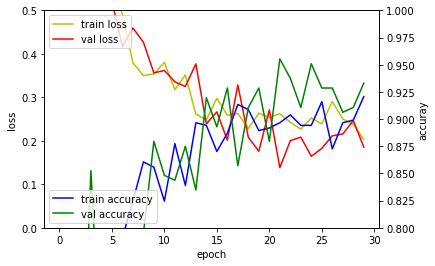

In [6]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [10]:
loss_and_metrics = model.evaluate(validation_generator, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

707/707 [==============================] - 111s 158ms/step - loss: 0.2094 - accuracy: 0.9179
## evaluation loss and_metrics ##
[0.20944558084011078, 0.9178688526153564]


In [11]:
model.save('./check_gender.h5')

In [ ]:
model_test = model.predict(test_generator, batch_size=32)

